# Baseball ML Models

### Logistic Regression Model

In [85]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [86]:
advanced = pd.read_csv("/Users/anishravilla/Desktop/Data Science Union/Clean Pitching Data.csv", float_precision = 'round_trip')

In [87]:
advanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            660 non-null    int64  
 1   Tm              660 non-null    object 
 2   BA              660 non-null    float64
 3   OBP             660 non-null    float64
 4   SLG             660 non-null    float64
 5   OPS             660 non-null    float64
 6   BAbip           660 non-null    float64
 7   HR%             660 non-null    float64
 8   SO%             660 non-null    float64
 9   BB%             660 non-null    float64
 10  LD%             660 non-null    float64
 11  GB%             660 non-null    float64
 12  FB%             660 non-null    float64
 13  GB/FB           660 non-null    float64
 14  WPA             660 non-null    float64
 15  cWPA            660 non-null    float64
 16  RE24            660 non-null    float64
 17  playoff_status  660 non-null    int

In [88]:
from sklearn.preprocessing import StandardScaler

advanced_nostr = advanced.drop(['Tm', 'Year'], axis = 1)

#Standardize data
cols = [name for name in advanced_nostr.columns]
target = advanced_nostr['playoff_status']



scale = StandardScaler()
advanced_nostr = pd.DataFrame(scale.fit_transform(advanced_nostr[cols]))
advanced_nostr['playoff_status'] = target
advanced_nostr = advanced_nostr.drop(15, axis = 1)
advanced_nostr.columns = cols

#Make copy of standardize data frame
advanced_copy = advanced_nostr


In [89]:
#Read in test data for 2022 season
test = pd.read_csv("/Users/anishravilla/Desktop/Data Science Union/2022_pitch_data.csv", float_precision = 'round_trip')

test['HR%'] = test['HR%'].str.extract('(\d+.\d+)%').astype('float')
test['SO%'] = test['SO%'].str.extract('(\d+.\d+)%').astype('float')
test['BB%'] = test['BB%'].str.extract('(\d+.\d+)%').astype('float')
test['LD%'] = test['LD%'].str.extract('(\d+.\d+)%').astype('float')
test['GB%'] = test['GB%'].str.extract('(\d+.\d+)%').astype('float')
test['FB%'] = test['FB%'].str.extract('(\d+.\d+)%').astype('float')
test['cWPA'] = test['cWPA'].str.extract('(\d+.\d+)%').astype('float')

test = test.drop('Tm', axis = 1)


In [90]:
cols = [name for name in test.columns]
#target = test['playoff_status']

scale = StandardScaler()
test = pd.DataFrame(scale.fit_transform(test[cols]))
#test['playoff_status'] = target
test.columns = cols



In [91]:
test1 = test.drop(['OBP','BAbip', 'BB%','FB%','OPS', 'SLG', 'GB/FB', 'WPA'], axis = 1)
test1.info()
test1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BA      29 non-null     float64
 1   HR%     29 non-null     float64
 2   SO%     29 non-null     float64
 3   LD%     29 non-null     float64
 4   GB%     29 non-null     float64
 5   cWPA    29 non-null     float64
 6   RE24    29 non-null     float64
dtypes: float64(7)
memory usage: 1.7 KB


,BA,HR%,SO%,LD%,GB%,cWPA,RE24
0,0.529528,0.14196,-1.485049,0.781154,-1.427010,-0.687179,-0.873126
1,-0.805803,-1.75812,1.456778,0.016480,0.316933,1.297700,1.072487
2,1.048823,0.14196,-1.051009,1.259075,-0.578606,-0.250505,0.346837
3,0.455343,0.14196,-0.086475,1.163490,-0.154403,-0.171110,-0.357064
4,0.529528,1.72536,0.154658,0.303233,0.364066,-1.004759,-1.055033
5,0.306973,0.14196,0.588698,-0.174688,-0.107270,-0.687179,-0.216679
6,1.048823,2.04204,0.202885,0.016480,-1.804079,-0.647481,-1.547368
7,-0.138138,0.45864,-0.134702,0.781154,-0.342938,-0.250505,0.186680
8,2.384154,-0.49140,-2.015543,2.310501,0.364066,-0.528388,-1.610640
9,0.158603,-0.80808,-1.099236,-0.557025,-0.672873,-0.885667,-0.645742


In [92]:
test_copy = test1.copy()
test_copy

,BA,HR%,SO%,LD%,GB%,cWPA,RE24
0,0.529528,0.14196,-1.485049,0.781154,-1.427010,-0.687179,-0.873126
1,-0.805803,-1.75812,1.456778,0.016480,0.316933,1.297700,1.072487
2,1.048823,0.14196,-1.051009,1.259075,-0.578606,-0.250505,0.346837
3,0.455343,0.14196,-0.086475,1.163490,-0.154403,-0.171110,-0.357064
4,0.529528,1.72536,0.154658,0.303233,0.364066,-1.004759,-1.055033
5,0.306973,0.14196,0.588698,-0.174688,-0.107270,-0.687179,-0.216679
6,1.048823,2.04204,0.202885,0.016480,-1.804079,-0.647481,-1.547368
7,-0.138138,0.45864,-0.134702,0.781154,-0.342938,-0.250505,0.186680
8,2.384154,-0.49140,-2.015543,2.310501,0.364066,-0.528388,-1.610640
9,0.158603,-0.80808,-1.099236,-0.557025,-0.672873,-0.885667,-0.645742


### Feature Selection
Need to figure out what features are most impactful in the dependent variable

In [93]:
#Look at correlation heat map to remove variables that are multi-collinear
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['feature'] = advanced_nostr.columns
vif_data['VIF'] = [variance_inflation_factor(advanced_nostr.values, i ) for i in range(len(advanced_nostr.columns))]

vif_data

,feature,VIF
0,BA,455.378272
1,OBP,1077.377940
2,SLG,3103.605866
3,OPS,7003.768020
4,BAbip,154.564276
5,HR%,34.332021
6,SO%,216.753669
7,BB%,26.451721
8,LD%,10.116244
9,GB%,71.113411


These variance inflation factors are very high, indicating that a lot of the variables do not seem to be independent of each other (presence of multicollinearity). To ensure that the independent assumption variable holds true we need to drop some variables. 

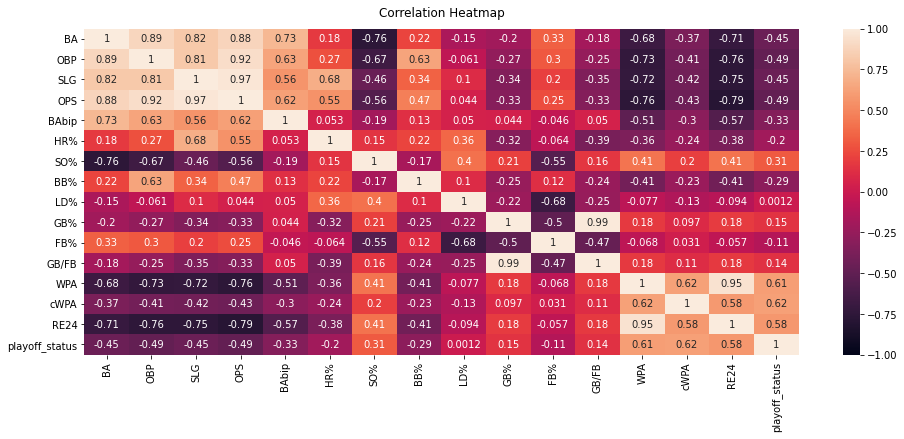

In [94]:
#Correlation Matrix:
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(advanced_nostr.corr(), vmin=-1, vmax=1, annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

#### Variables that are Highly Correlated:
Below are some of the variable pairings that have a high correlation and thus a high VIF
- OPS and OPB (0.92)
- OPS and SLG (0.97)
- GB/FB and GB percentage (0.99)
- WPA and RE24 (0.95)
- BA and OBP (0.89)
- BA and SLG (0.88)


In [95]:
#A lot of these variables are highly correlated since they come from the same categories of pitching statistics
#So let's drop them to and have the most important statistics from each category
advanced_nostr = advanced_nostr.drop(['OBP','BAbip', 'BB%','FB%','OPS', 'SLG', 'GB/FB', 'WPA'], axis = 1)



In [96]:
#Store cleaned data Frame for later use
train_copy = advanced_nostr.copy()

In [97]:
#Compute VIF Scores again
vif_data = pd.DataFrame()
vif_data['feature'] = advanced_nostr.columns
vif_data['VIF'] = [variance_inflation_factor(advanced_nostr.values, i ) for i in range(len(advanced_nostr.columns))]

vif_data

,feature,VIF
0,BA,4.590140
1,HR%,1.637782
2,SO%,3.767806
3,LD%,1.508959
4,GB%,1.329603
5,cWPA,1.725750
6,RE24,3.060383
7,playoff_status,1.478595


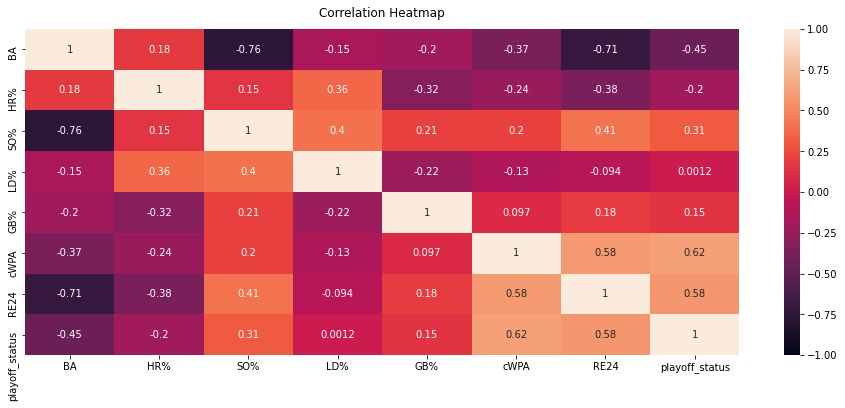

In [98]:
#New heatmap
#Correlation Matrix:
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(advanced_nostr.corr(), vmin=-1, vmax=1, annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [100]:
#Train logistic regression model
from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(advanced_nostr.drop('playoff_status', axis = 1), advanced_nostr['playoff_status'], test_size=0.25, random_state=0)

In [101]:
x_train = advanced_nostr.drop('playoff_status', axis = 1)
y_train = advanced_nostr['playoff_status'] 

In [102]:
from sklearn.linear_model import LogisticRegression

#Create instance of logistic regression model
lgr1 = LogisticRegression(solver = 'liblinear', )

#Train model on training data
lgr1.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [103]:
#Print out coefficients for each variable in model - Note: they are the logit coefficients
coef_dict = {}

for index in range(len(advanced_nostr.columns) - 1):
    coef_dict[advanced_nostr.columns[index]] = round(float(lgr1.coef_.reshape(7, 1)[index], ), 4)

coef_dict['intercept'] = round(float(lgr1.intercept_.reshape(1,1)), 4)
coef_dict

{'BA': -0.1123,
 'HR%': 0.0129,
 'SO%': 0.1515,
 'LD%': 0.2813,
 'GB%': 0.2185,
 'cWPA': 1.204,
 'RE24': 1.1071,
 'intercept': -1.2203}

#### Interpretation:
The coefficients in this model represent the average increase in the log(probability) of making the playoffs based on a 1 unit increase in that predictor variable, while holding other variables constant

- For instance, for every 1 unit increase in the Strike Out percentage, the logistic model predicts a 0.33 increase in the log-probability of making the playoffs.  

Let the coefficient for SO% take on the value of B. e^0.1515, which equals 1.164, represents the odds of a team making the playoffs, so the strike out percentage represents a **16.4 percent increase** with each 1 unit increase in Strike- Out% in the odds of making the playoffs, with the baseline being an odds value of 1.

In [104]:
#Make predictions on x_test
preds = lgr1.predict(test1)
preds.shape

#Get probabilities of the predicted outcome at each index
preds_probs = lgr1.predict_proba(test1)
preds_probs
#first value is the probability of outcome being zero, second is p(x) of being 1

array([[0.96735366, 0.03264634],
       [0.13103851, 0.86896149],
       [0.76588897, 0.23411103],
       [0.83067208, 0.16932792],
       [0.9691404 , 0.0308596 ],
       [0.90917311, 0.09082689],
       [0.98468043, 0.01531957],
       [0.76303652, 0.23696348],
       [0.97037899, 0.02962101],
       [0.97068523, 0.02931477],
       [0.02749988, 0.97250012],
       [0.98161921, 0.01838079],
       [0.89167288, 0.10832712],
       [0.05345438, 0.94654562],
       [0.88245265, 0.11754735],
       [0.49884003, 0.50115997],
       [0.88676803, 0.11323197],
       [0.16074591, 0.83925409],
       [0.00978235, 0.99021765],
       [0.97830151, 0.02169849],
       [0.8242386 , 0.1757614 ],
       [0.98069235, 0.01930765],
       [0.53999851, 0.46000149],
       [0.57890582, 0.42109418],
       [0.90343411, 0.09656589],
       [0.67709508, 0.32290492],
       [0.44905286, 0.55094714],
       [0.92341488, 0.07658512],
       [0.6401539 , 0.3598461 ]])

In [105]:
#Let's check for possible overfitting by looking at training set error
score = lgr1.score(x_train, y_train)
score 

0.8681818181818182

In [106]:
#Predict which teams make the playoffs
predicted_playoff = preds

test1['predicted_playoff_LGR1'] = predicted_playoff
test1['Tm'] = advanced['Tm']




,BA,HR%,SO%,LD%,GB%,cWPA,RE24
0,0.529528,0.14196,-1.485049,0.781154,-1.427010,-0.687179,-0.873126
1,-0.805803,-1.75812,1.456778,0.016480,0.316933,1.297700,1.072487
2,1.048823,0.14196,-1.051009,1.259075,-0.578606,-0.250505,0.346837
3,0.455343,0.14196,-0.086475,1.163490,-0.154403,-0.171110,-0.357064
4,0.529528,1.72536,0.154658,0.303233,0.364066,-1.004759,-1.055033
5,0.306973,0.14196,0.588698,-0.174688,-0.107270,-0.687179,-0.216679
6,1.048823,2.04204,0.202885,0.016480,-1.804079,-0.647481,-1.547368
7,-0.138138,0.45864,-0.134702,0.781154,-0.342938,-0.250505,0.186680
8,2.384154,-0.49140,-2.015543,2.310501,0.364066,-0.528388,-1.610640
9,0.158603,-0.80808,-1.099236,-0.557025,-0.672873,-0.885667,-0.645742


In [107]:
#Fit logistic regression model on all variables:
x = advanced_copy.drop(['playoff_status'], axis = 1)
y = advanced_copy['playoff_status']

lgr2 = LogisticRegression()
lgr2.fit(x,y)

LogisticRegression()

In [108]:
#Let's check for possible overfitting by looking at training set error
score1 = lgr2.score(x, y)
score1 

0.8712121212121212

In [109]:
preds2 = lgr2.predict(test)
test['predicted_playoff_LGR2'] = preds2
test['Tm'] = advanced['Tm']

test

,BA,OBP,SLG,OPS,BAbip,HR%,SO%,BB%,LD%,GB%,FB%,GB/FB,WPA,cWPA,RE24,predicted_playoff_LGR2,Tm
0,0.529528,0.391434,0.463781,0.449883,-0.267981,0.14196,-1.485049,-0.133842,0.781154,-1.427010,1.479821,-1.318456,-1.205055,-0.687179,-0.873126,0,Arizona Diamondbacks
1,-0.805803,-0.506431,-1.617711,-1.231905,0.492270,-1.75812,1.456778,0.366987,0.016480,0.316933,-0.224149,0.299188,1.199917,1.297700,1.072487,1,Atlanta Braves
2,1.048823,0.455567,0.904096,0.730181,0.661215,0.14196,-1.051009,-1.010293,1.259075,-0.578606,0.028291,-0.583163,0.603995,-0.250505,0.346837,0,Baltimore Orioles
3,0.455343,0.583834,0.343695,0.449883,0.576743,0.14196,-0.086475,0.366987,1.163490,-0.154403,-1.423240,-0.141988,0.348600,-0.171110,-0.357064,0,Boston Red Sox
4,0.529528,0.647967,1.144268,1.010478,0.576743,1.72536,0.154658,0.617401,0.303233,0.364066,-0.097929,0.299188,-0.353737,-1.004759,-1.055033,0,Chicago Cubs
5,0.306973,0.583834,0.223609,0.347956,0.999104,0.14196,0.588698,1.243437,-0.174688,-0.107270,0.596281,-0.141988,-0.162191,-0.687179,-0.216679,0,Chicago White Sox
6,1.048823,1.802365,1.824756,1.876854,1.252522,2.04204,0.202885,1.994680,0.016480,-1.804079,1.858481,-1.759631,-1.375318,-0.647481,-1.547368,0,Cincinnati Reds
7,-0.138138,-0.314032,-0.096621,-0.187158,-0.436926,0.45864,-0.134702,-0.509464,0.781154,-0.342938,0.343841,-0.436105,-0.013210,-0.250505,0.186680,0,Cleveland Indians
8,2.384154,1.738232,1.824756,1.876854,2.012773,-0.49140,-2.015543,0.366987,2.310501,0.364066,-0.792140,0.299188,-1.098640,-0.528388,-1.610640,0,Colorado Rockies
9,0.158603,-0.057499,-0.256736,-0.187158,-0.521399,-0.80808,-1.099236,-0.008635,-0.557025,-0.672873,1.227381,-0.730222,-1.013508,-0.885667,-0.645742,0,Detroit Tigers


#### Summary of 2 Models
The first model, with just seven predictors, predicts 7 teams to make the playoffs, while the second model with all the predictors only predicts 8 teams to make the playoffs. The second model has a slightly higher training data accuracy score (87.1%) while the first model has a lower score at (86.8%). Since the second model uses all the predictors, bias is lower and varinace is higher, so the model has a higher likelihood of having overfit the training data. The only difference in predictions is that the first model does not predict the Padres to go to the playoffs. However, the model does not reach the full 12 allotted slots for the playoffs. 

In [110]:
#Model with seven predictors

import statsmodels.api as sm
logit_model=sm.Logit(advanced_nostr['playoff_status'],advanced_nostr.drop('playoff_status', axis = 1))
result=logit_model.fit()
print(result.summary2())


Optimization terminated successfully.
         Current function value: 0.428248
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.305     
Dependent Variable: playoff_status   AIC:              579.2875  
Date:               2022-08-04 22:42 BIC:              610.7332  
No. Observations:   660              Log-Likelihood:   -282.64   
Df Model:           6                LL-Null:          -406.50   
Df Residuals:       653              LLR p-value:      1.2613e-50
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-------------------------------------------------------------------
            Coef.    Std.Err.      z      P>|z|     [0.025   0.975]
-------------------------------------------------------------------
BA         -0.1060     0.2266   -0.4679   0.6399   -0.5502   0.3381
HR%         0.0162     0.1308    0.1240   0.9013   -0.2401

In [111]:
#Model with all of the predictors
logit_model2 = sm.Logit(advanced['playoff_status'],advanced.drop(['playoff_status', 'Tm', 'Year'], axis = 1))
result1=logit_model2.fit()
print(result1.summary2())

Optimization terminated successfully.
         Current function value: 0.335392
         Iterations 9
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.455     
Dependent Variable: playoff_status   AIC:              472.7176  
Date:               2022-08-04 22:42 BIC:              540.1012  
No. Observations:   660              Log-Likelihood:   -221.36   
Df Model:           14               LL-Null:          -406.50   
Df Residuals:       645              LLR p-value:      2.2657e-70
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     9.0000                                       
------------------------------------------------------------------
           Coef.    Std.Err.     z     P>|z|     [0.025    0.975] 
------------------------------------------------------------------
BA        -56.1452  147.8392  -0.3798  0.7041  -345.9047  233.6143
OBP         6.5129  238.7719   0.0273  0.9782  -461.4714  474.

#### Overall Summary:

The logistic regression model is used to fit data when the response variable is a binary classfication output - in this case the two classes are whether a team made the playoffs or didn't make the playoffs. The last cell indicates the logit model (where the output is the playoff odds) is significant with a p-value of close to zero. However, the two most significant variables in this model seem to be cWPA and RE24, perhaps because these statistics address win probability of baseball teams. Ov 

### Linear Discriminant Analysis Model

In [129]:
#Create copies of original datasets to train and test off of
X_train = train_copy.drop('playoff_status', axis = 1)
y_train = train_copy['playoff_status']
X_test = test_copy.copy()
Tm = advanced['Tm']


,BA,HR%,SO%,LD%,GB%,cWPA,RE24
0,0.529528,0.14196,-1.485049,0.781154,-1.427010,-0.687179,-0.873126
1,-0.805803,-1.75812,1.456778,0.016480,0.316933,1.297700,1.072487
2,1.048823,0.14196,-1.051009,1.259075,-0.578606,-0.250505,0.346837
3,0.455343,0.14196,-0.086475,1.163490,-0.154403,-0.171110,-0.357064
4,0.529528,1.72536,0.154658,0.303233,0.364066,-1.004759,-1.055033
5,0.306973,0.14196,0.588698,-0.174688,-0.107270,-0.687179,-0.216679
6,1.048823,2.04204,0.202885,0.016480,-1.804079,-0.647481,-1.547368
7,-0.138138,0.45864,-0.134702,0.781154,-0.342938,-0.250505,0.186680
8,2.384154,-0.49140,-2.015543,2.310501,0.364066,-0.528388,-1.610640
9,0.158603,-0.80808,-1.099236,-0.557025,-0.672873,-0.885667,-0.645742


In [130]:
#Import LDA libraries and create model 
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#Fit on whole dataset
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)

#Accuracy of training model
print(lda.score(X_train,y_train))

0.8712121212121212


In [131]:
#Use k-fold cross validation to create different splits of data and predict on test set
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(lda, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print("Average CV Score: " + str(round(np.mean(scores), 2)))
print("Max Score: " + str(round(np.max(scores), 2)))


Average CV Score: 0.87
Max Score: 0.94


In [132]:
#Make predictions:
preds_playoff_Status = lda.predict(X_test)
preds_playoff_Status


array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0])

In [133]:
#Add to data frame 
X_test['preds_playoff_Status'] = preds_playoff_Status
X_test['Team'] = Tm[0:30]
X_test

,BA,HR%,SO%,LD%,GB%,cWPA,RE24,preds_playoff_Status,Team
0,0.529528,0.14196,-1.485049,0.781154,-1.427010,-0.687179,-0.873126,0,Arizona Diamondbacks
1,-0.805803,-1.75812,1.456778,0.016480,0.316933,1.297700,1.072487,1,Atlanta Braves
2,1.048823,0.14196,-1.051009,1.259075,-0.578606,-0.250505,0.346837,0,Baltimore Orioles
3,0.455343,0.14196,-0.086475,1.163490,-0.154403,-0.171110,-0.357064,0,Boston Red Sox
4,0.529528,1.72536,0.154658,0.303233,0.364066,-1.004759,-1.055033,0,Chicago Cubs
5,0.306973,0.14196,0.588698,-0.174688,-0.107270,-0.687179,-0.216679,0,Chicago White Sox
6,1.048823,2.04204,0.202885,0.016480,-1.804079,-0.647481,-1.547368,0,Cincinnati Reds
7,-0.138138,0.45864,-0.134702,0.781154,-0.342938,-0.250505,0.186680,0,Cleveland Indians
8,2.384154,-0.49140,-2.015543,2.310501,0.364066,-0.528388,-1.610640,0,Colorado Rockies
9,0.158603,-0.80808,-1.099236,-0.557025,-0.672873,-0.885667,-0.645742,0,Detroit Tigers


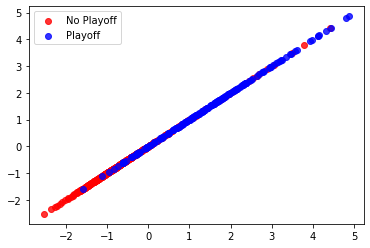

In [134]:
#LDA plot
plt.figure()
colors = ['red','blue']
lw = 2

model = LinearDiscriminantAnalysis()
data_plot = model.fit(X_train, y_train).transform(X_train)

target_names = ['No Playoff', 'Playoff']

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(data_plot[y_train == i, 0], data_plot[y_train == i, 0], alpha=.8, color=color,
                label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)

#display LDA plot
plt.show()

#### Summary:
Linear Discriminant Analysis tries to maximize the distance between the means of the two categories and their respective predictor variables, while also minimizing the variation between the observations of the predictors in each of the categories as well, in order to separate the points as clearly as possible to try and find a decision boundary between the two groups. The decision boundary is not the clearest between the two classes, suggesting that there is a lot of overlap in the statistics of teams that make the playoffs and teams that do not. 

The LDA model performed well overall, with a mean Cross-validation score of 87%, and it came to the same conclusions as the logistic regression model in determining which teams would make the playoffs for the 2022 MLB season. 

### Random Forest Classifier

In [135]:
#Create copies of original datasets to train and test off of
X_train = train_copy.drop('playoff_status', axis = 1)
y_train = train_copy['playoff_status']
X_test = test_copy.copy()

Tm = advanced['Tm']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Average CV Score: 0.86


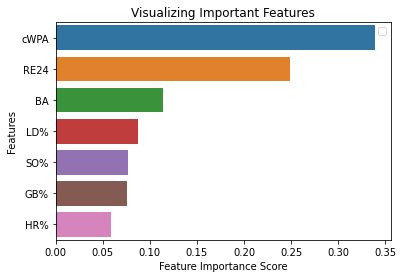

,BA,HR%,SO%,LD%,GB%,cWPA,RE24
0,0.529528,0.14196,-1.485049,0.781154,-1.427010,-0.687179,-0.873126
1,-0.805803,-1.75812,1.456778,0.016480,0.316933,1.297700,1.072487
2,1.048823,0.14196,-1.051009,1.259075,-0.578606,-0.250505,0.346837
3,0.455343,0.14196,-0.086475,1.163490,-0.154403,-0.171110,-0.357064
4,0.529528,1.72536,0.154658,0.303233,0.364066,-1.004759,-1.055033
5,0.306973,0.14196,0.588698,-0.174688,-0.107270,-0.687179,-0.216679
6,1.048823,2.04204,0.202885,0.016480,-1.804079,-0.647481,-1.547368
7,-0.138138,0.45864,-0.134702,0.781154,-0.342938,-0.250505,0.186680
8,2.384154,-0.49140,-2.015543,2.310501,0.364066,-0.528388,-1.610640
9,0.158603,-0.80808,-1.099236,-0.557025,-0.672873,-0.885667,-0.645742


In [136]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 100)
forest.fit(X_train, y_train)

feature_imp = pd.Series(forest.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(forest, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print("Average CV Score: " + str(round(np.mean(scores), 2)))
#Print out order of importance for features
sns.barplot(x=feature_imp, y=feature_imp.index)


# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()


To increase the overall accuracy of the model, we could remove the features with the lowest importance. For the sake of this analysis, I chose to keep all of these variables as I had already performed a feature selection from the larger dataset.

In [137]:
#Make predictions
preds = forest.predict(X_test)
X_test['preds_playoff_Status'] = preds

preds

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0])

#### Summary:
The random forest classifier functions by constructing trees that make branching decisions based off of each feature. It will try to pick a point in the variable to split the boundary, and then make a decision based on this split. Each tree is based off of random splits of the features, leading to a "forest" of trees that are uncorrelated, and thus independent of each other. 

The random forest classifier does not perform as well as LDA, achieving only 86% accuracy with the cross-validation. However, it is able to predict 8 teams overall, sharing all the same teams as LDA and logistic regression. 